In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics 
import math

# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import shap


In [2]:
#Importing Data

data = pd.read_csv(r'application_train.csv')
df = pd.DataFrame(data)

In [3]:
## I know that there are many variables with many NaNs. Will look at the variables to see if  there is a large imbalance in 
## in variables with NaNs.

In [4]:
#Looking to see which coolumn has most NaNs
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

In [5]:
# deleting colums with most NaNs. All these colums have more than 10K NaNs. Some have more than 20K.
NaNs = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


X = df.drop(['TARGET','SK_ID_CURR'], axis=1)
X = X.drop(NaNs, axis = 1)
  
Y = df['TARGET']

le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                                                           
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])



#Any NaNs that are left, are less than 1K per feature. Therefore, replacing these NaNs with means of that column

X.fillna(X.mean(), inplace=True)
X = X.fillna(X.mean())

X.shape

(307511, 64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

rf = RandomForestRegressor(n_estimators=65)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=65, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
rf.feature_importances_

array([2.00827431e-03, 5.03437317e-03, 4.18259664e-03, 6.80800844e-03,
       8.60486423e-03, 5.09720616e-02, 4.92501852e-02, 6.62051184e-02,
       3.67580229e-02, 1.16210965e-02, 8.73372555e-03, 1.05193751e-02,
       1.65794047e-02, 1.05699856e-02, 4.92137990e-02, 8.17122367e-02,
       6.95004711e-02, 8.04679826e-02, 7.80708440e-02, 2.64496290e-02,
       0.00000000e+00, 6.99193164e-04, 6.79245309e-03, 6.30103430e-04,
       6.33385668e-03, 4.49708544e-03, 2.61157385e-02, 1.28837019e-02,
       5.11591440e-03, 5.55471310e-03, 2.60574808e-02, 4.28478492e-02,
       1.88795864e-03, 2.18120376e-03, 2.35818983e-03, 5.52368491e-03,
       4.96305526e-03, 5.15759594e-03, 3.51984796e-02, 1.57990830e-02,
       8.05890416e-03, 1.61504903e-02, 7.33298953e-03, 6.80171638e-02,
       6.44025602e-05, 4.34040744e-03, 6.73840364e-07, 2.39304137e-03,
       2.29659854e-03, 8.74800781e-05, 2.33074874e-03, 8.28429076e-04,
       0.00000000e+00, 4.73506790e-04, 0.00000000e+00, 2.76055084e-04,
      

Text(0.5, 0, 'Random Forest Feature Importance')

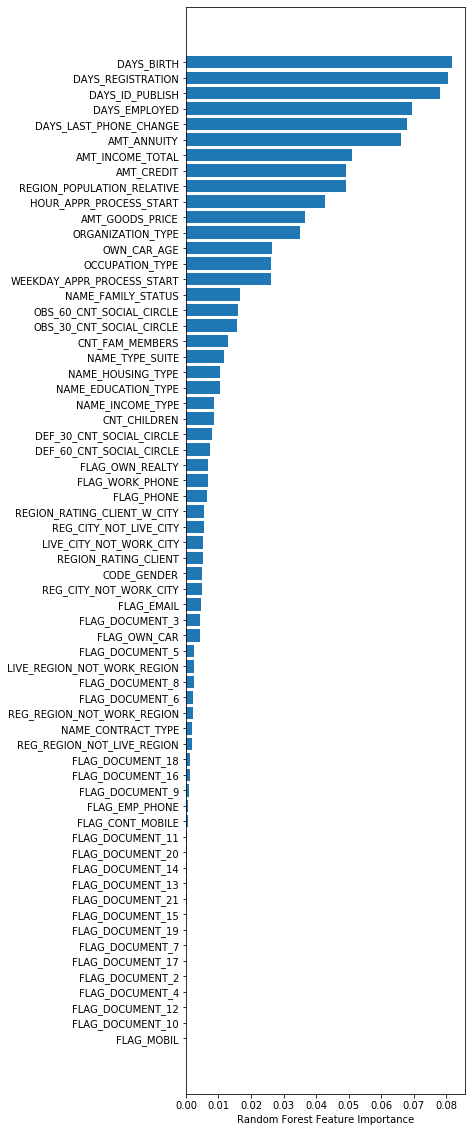

In [8]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize = (5,20))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [9]:
# Will be using up until variable FLAG_DOCUMENT_16 because after that the variables are not visible anymore.
# Will be testing the accuracy of the different variables. 

In [10]:
feature_importance =['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE',
                'AMT_ANNUITY','AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','AMT_CREDIT','HOUR_APPR_PROCESS_START',
                'AMT_GOODS_PRICE','ORGANIZATION_TYPE','OWN_CAR_AGE','WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE',
                'NAME_FAMILY_STATUS','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS',
                'NAME_TYPE_SUITE','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','CNT_CHILDREN',
                'DEF_30_CNT_SOCIAL_CIRCLE','FLAG_OWN_REALTY','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_WORK_PHONE',
                'FLAG_PHONE','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','REGION_RATING_CLIENT','CODE_GENDER',
                'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_EMAIL','FLAG_DOCUMENT_3','FLAG_OWN_CAR',
                'FLAG_DOCUMENT_8','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','NAME_CONTRACT_TYPE',
                'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_18','FLAG_DOCUMENT_16'] 



In [11]:
X = X[feature_importance]
Y = df.TARGET
X.shape

(307511, 47)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=500)

In [13]:
# Training with Random Forest

ind = [10, 15, 20, 25, 30, 35, 40, 47]

for i in ind:
    model = RandomForestClassifier(n_estimators = 10, random_state = 10)
    model = model.fit(X_train.iloc[:,:i],y_train)
    train_score = model.score(X_train.iloc[:,:i], y_train)
    test_score = model.score(X_test.iloc[:,:i], y_test)

    print("Number of features: ", i)
    print("Accuracy score (training): ", train_score)
    print("Accuracy score (test): ", test_score)

Number of features:  10
Accuracy score (training):  0.9838227833831238
Accuracy score (test):  0.9194698093082546
Number of features:  15
Accuracy score (training):  0.9841219599970515
Accuracy score (test):  0.9195738702879888
Number of features:  20
Accuracy score (training):  0.98397020374361
Accuracy score (test):  0.9194047711959208
Number of features:  25
Accuracy score (training):  0.9840872728534078
Accuracy score (test):  0.9193527407060538
Number of features:  30
Accuracy score (training):  0.9843647700025582
Accuracy score (test):  0.9194698093082546
Number of features:  35
Accuracy score (training):  0.9842477008927604
Accuracy score (test):  0.9195998855329223
Number of features:  40
Accuracy score (training):  0.9841566471406954
Accuracy score (test):  0.9197039465126564
Number of features:  47
Accuracy score (training):  0.9843300828589143
Accuracy score (test):  0.919560862665522


In [14]:
model = RandomForestClassifier(n_estimators = 500, random_state = 500)
model = model.fit(X_train.iloc[:,:40],y_train)
train_score = model.score(X_train.iloc[:,:40], y_train)
test_score = model.score(X_test.iloc[:,:40], y_test)
print("Accuracy score (training): ", train_score)
print("Accuracy score (test): ", test_score)

Accuracy score (training):  1.0
Accuracy score (test):  0.9202502666562605


Text(0.5, 1.0, 'Random Forect ROC Curve')

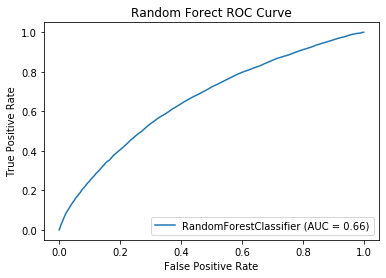

In [15]:
metrics.plot_roc_curve(model,X_test.iloc[:,:40],y_test)
plt.title("Random Forect ROC Curve")

In [16]:
#### Now, Training with GBT ###

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

In [18]:
# Training with GBT

ind = [10, 15, 20, 25, 30, 35, 40, 47]

for i in ind:
    model_gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=10)
    model_gb.fit(X_train.iloc[:,:i], y_train)
    train_score = model_gb.score(X_train.iloc[:,:i], y_train)
    test_score = model_gb.score(X_test.iloc[:,:i], y_test)

    print("Number of features: ", i)
    print("Accuracy score (training): ", train_score)
    print("Accuracy score (test): ", test_score)

Number of features:  10
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  15
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  20
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  25
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  30
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  35
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  40
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  47
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354


In [19]:
lr_list = [10e-6, 10e-3, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.10, 1.5, 2, 2.5, 10]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=learning_rate, random_state=10)
    gb_clf.fit(X_train.iloc[:,:47], y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ", (gb_clf.score(X_train.iloc[:,:47], y_train)))
    print("Accuracy score (test): ",(gb_clf.score(X_test.iloc[:,:47], y_test)))

Learning rate:  1e-05
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Learning rate:  0.01
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Learning rate:  0.01
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Learning rate:  0.05
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Learning rate:  0.075
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Learning rate:  0.1
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Learning rate:  0.25
Accuracy score (training):  0.9189823095183897
Accuracy score (test):  0.9204429052241354
Learning rate:  0.5
Accuracy score (training):  0.9189945042437644
Accuracy score (test):  0.9204266458546737
Learning rate:  0.75
Accuracy score (training):  0.9190066989691392
Accuracy score (test):  0.9203941271157504
L

In [20]:
model_gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=500)
model_gb.fit(X_train.iloc[:,:47], y_train)
train_score = model_gb.score(X_train.iloc[:,:47], y_train)
test_score = model_gb.score(X_test.iloc[:,:47], y_test)
print("Accuracy score (training): ", train_score)
print("Accuracy score (test): ", test_score)

Accuracy score (training):  0.9192465285681767
Accuracy score (test):  0.9203290896379038


Text(0.5, 1.0, 'GBT ROC Curve')

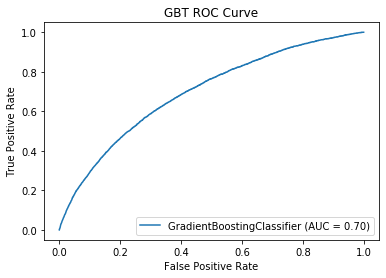

In [21]:
metrics.plot_roc_curve(model_gb,X_test.iloc[:,:47],y_test)
plt.title("GBT ROC Curve")

In [22]:
#### Now, Training with Logistic Regression ###

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

In [24]:
# Training with Log Reg

ind = [10, 15, 20, 25, 30, 35, 40, 47]

for i in ind:
    model_log = LogisticRegression(random_state=10,max_iter = 500,tol=1e-6,multi_class='ovr',solver='liblinear')
    model_log.fit(X_train.iloc[:,:i], y_train)
    train_score = model_log.score(X_train.iloc[:,:i], y_train)
    test_score = model_log.score(X_test.iloc[:,:i], y_test)

    print("Number of features: ", i)
    print("Accuracy score (training): ", train_score)
    print("Accuracy score (test): ", test_score)

Number of features:  10
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  15
Accuracy score (training):  0.9189701147930148
Accuracy score (test):  0.9204266458546737
Number of features:  20
Accuracy score (training):  0.9189660498845565
Accuracy score (test):  0.9204266458546737
Number of features:  25
Accuracy score (training):  0.9189782446099314
Accuracy score (test):  0.9204429052241354
Number of features:  30
Accuracy score (training):  0.9189660498845565
Accuracy score (test):  0.9204429052241354
Number of features:  35
Accuracy score (training):  0.9189701147930148
Accuracy score (test):  0.9204429052241354
Number of features:  40
Accuracy score (training):  0.9189701147930148
Accuracy score (test):  0.9204429052241354
Number of features:  47
Accuracy score (training):  0.9189741797014731
Accuracy score (test):  0.9204429052241354


In [25]:
model_log = LogisticRegression(random_state=500,max_iter = 500,tol=1e-6,multi_class='ovr',solver='liblinear')
model_log.fit(X_train, y_train)
train_score = model_log.score(X_train, y_train)
test_score = model_log.score(X_test, y_test)
print("Accuracy score (training): ", train_score)
print("Accuracy score (test): ", test_score)

Accuracy score (training):  0.9189741797014731
Accuracy score (test):  0.9204429052241354


Text(0.5, 1.0, 'Logistic Regression ROC Curve')

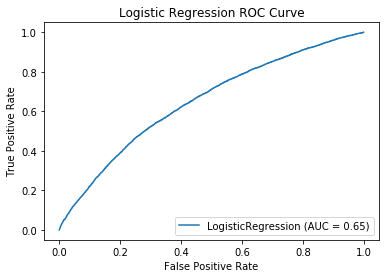

In [26]:
metrics.plot_roc_curve(model_log,X_test,y_test)
plt.title("Logistic Regression ROC Curve")